In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
%matplotlib inline

In [2]:
# load hourly data
hr_df=pd.read_csv("data/hour.csv")

In [3]:
#get some generic statistics about data
print(f"Shape: {hr_df.shape}")
print(f"No of missing values: {hr_df.isnull().sum().sum()}")
hr_df.head(5)

Shape: (17379, 17)
No of missing values: 0


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
#get statistics on numerical columns
hr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


From the Readme.txt data file, our columns can be split into 3 major categories:
  **temporal features**:relating to time. They include dteday, season,   yr, mnth, hr, holiday, weekday, and workingday columns 
  **weather related features**: info on weather conditions. Include; weathersit, temp, atemp, hum, and windspeed columns. 
  **record related features** info about the number of records for the specific hour and date. Include; casual, registered, and     cnt columns. 

# Data Preprocessing

## 1. Data Preprocessing on Temporal and Weather related Columns

In [5]:
#create a copy of original data
preprocdata_df=hr_df.copy()

In [6]:
# transform seasons
sesns_mapping = {1: 'winter', 2: 'spring',
                   3: 'summer', 4: 'fall'}

preprocdata_df['season']=preprocdata_df['season'].apply(lambda x:sesns_mapping[x])

# transform year
yr_mapping={0: 2011, 1: 2012}
preprocdata_df['yr']=preprocdata_df['yr'].apply(lambda x: yr_mapping[x])

# transform weekday
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', \
                   3: 'Wednesday', 4: 'Thursday', 5: 'Friday', \
                   6: 'Saturday'} 
preprocdata_df['weekday']= preprocdata_df['weekday'].apply(lambda x: weekday_mapping[x]                   )

# transform weathersit
weather_mapping = {1: 'clear', 2: 'cloudy', \
                   3: 'light_rain_snow', 4: 'heavy_rain_snow'}

preprocdata_df['weathersit']=preprocdata_df['weathersit'].apply(lambda x: weather_mapping[x])

# transform hum and windspeed
preprocdata_df['hum'] = preprocdata_df['hum']*100
preprocdata_df['windspeed'] = preprocdata_df['windspeed']*67


In [7]:
#  visualize preprocessed columns
cols = ['season', 'yr', 'weekday', 'weathersit', 'hum', 'windspeed']
preprocdata_df[cols].sample(10,random_state=130)

,season,yr,weekday,weathersit,hum,windspeed
8,winter,2011,Saturday,clear,75.0,0.0000
15786,fall,2012,Wednesday,cloudy,68.0,6.0032
3665,spring,2011,Monday,clear,29.0,12.9980
5258,summer,2011,Friday,clear,53.0,11.0014
15847,fall,2012,Saturday,clear,53.0,16.9979
14180,summer,2012,Sunday,clear,65.0,0.0000
3925,spring,2011,Friday,clear,69.0,16.9979
4300,summer,2011,Sunday,clear,58.0,12.9980
714,winter,2011,Wednesday,light_rain_snow,93.0,8.9981
2713,spring,2011,Wednesday,cloudy,88.0,23.9994


**Now our transformed features have categorical values instead of numerical features.Our data is now readable and can allow certain features of pandas to function properly.

In [8]:
""" assert registered + casual(non registered) = total number of rides"""
assert(preprocdata_df.casual + preprocdata_df.registered == preprocdata_df.cnt).all(),\
       'Sum of casual and registered rides not equal to total number of rides'

C:\Users\user\anaconda4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


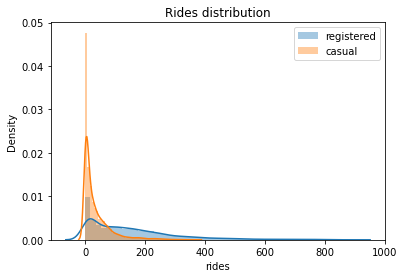

In [9]:
# plot distributions of registered vs casual rides
sns.distplot(preprocdata_df['registered'],label='registered')
sns.distplot(preprocdata_df['casual'],label='casual')
plt.legend()
plt.xlabel('rides')
plt.title('Rides distribution')
plt.savefig('figs/rides_distributions.png', format='png')

Notice that our data is skewed to the right. This implies for most of our data , a zero or a small number of rides were recorded.

Also, we can see that registered users outperformed casual ones. Furthermore,  registered rides has quite a larger number of rides (more than 800).

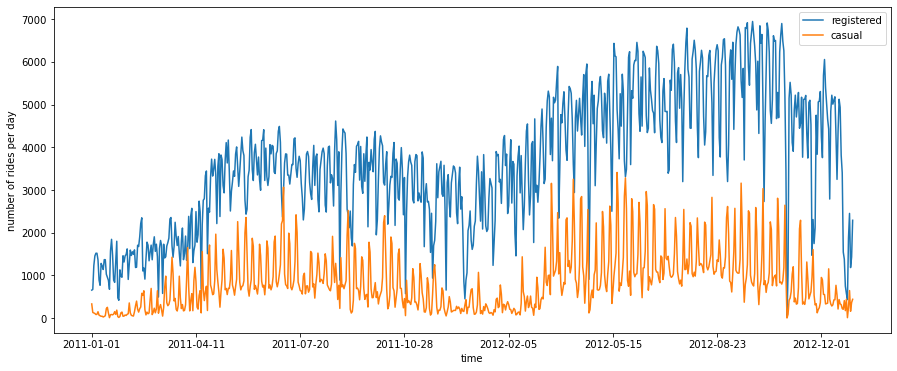

In [10]:
# plot evolution of rides over time
evol_data = preprocdata_df[['registered', 'casual', 'dteday']]
ax = evol_data.groupby('dteday').sum().plot(figsize=(15,6))
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");
plt.savefig('figs/rides_daily.png', format='png')                        

Clearly the number of registered rides is always above and significantly higher than the number of casuall riders. 

We that know that spring runs from March 1 to May 31; summer runs from June 1 to August 31; fall (autumn) runs from September 1 to November 30; and. winter runs from December 1 to February 28(According to google).

In the above figure, we can see a pattern where the number of rides per day is lower during the winter and significantly higher during summer.

**(which is totally in line with our expectations, as bad weather and low temperatures have a negative impact on ride sharing services)**

However, there is high variance in our time series figure and we need to kind of smooothen the curve. 

## 1.1 smoothening time series using rolling mean and standard deviations

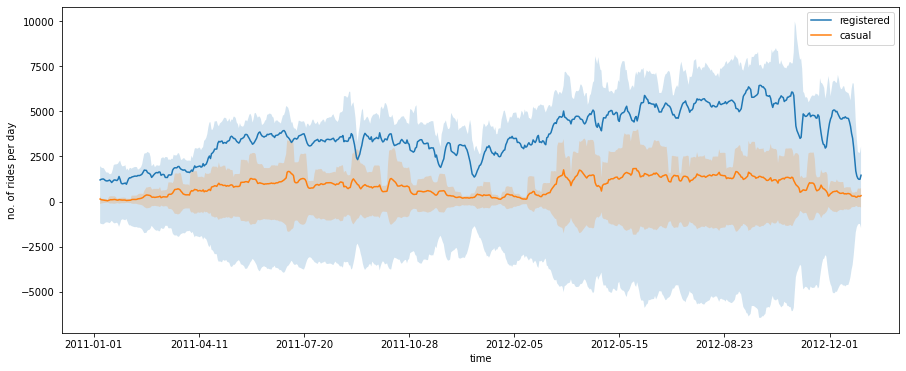

In [11]:
#Create new dataframe with columns we want to inspect
plot_data=preprocdata_df[['registered', 'casual', 'dteday']]
plot_data=plot_data.groupby('dteday').sum()    

# Define window for  computing rolling mean and standard deviation
window=7
rolln_means=plot_data.rolling(window).mean()
rolln_sd=plot_data.rolling(window).std()

"""
Create a plot of the series by;
             1. ploting the series of rolling means, 
             2. color the zone between the series of rolling means +- 2 rolling standard deviations
"""
ax = rolln_means.plot(figsize=(15,6))
ax.fill_between(rolln_means.index,rolln_means['registered'] + 2*rolln_sd['registered'],\
               rolln_means['registered'] - 2*rolln_means['registered'],\
               alpha=0.2)
ax.fill_between(rolln_means.index,rolln_means['casual'] + 2*rolln_sd['casual'],\
               rolln_means['casual'] - 2*rolln_means['casual'],\
               alpha=0.2)

ax.set_xlabel("time");
ax.set_ylabel("no. of rides per day");
plt.savefig('figs/rides_aggragated.png',format='png')

## 1.2 Distributions ride requests by  hours and days of the week

C:\Users\user\anaconda4\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


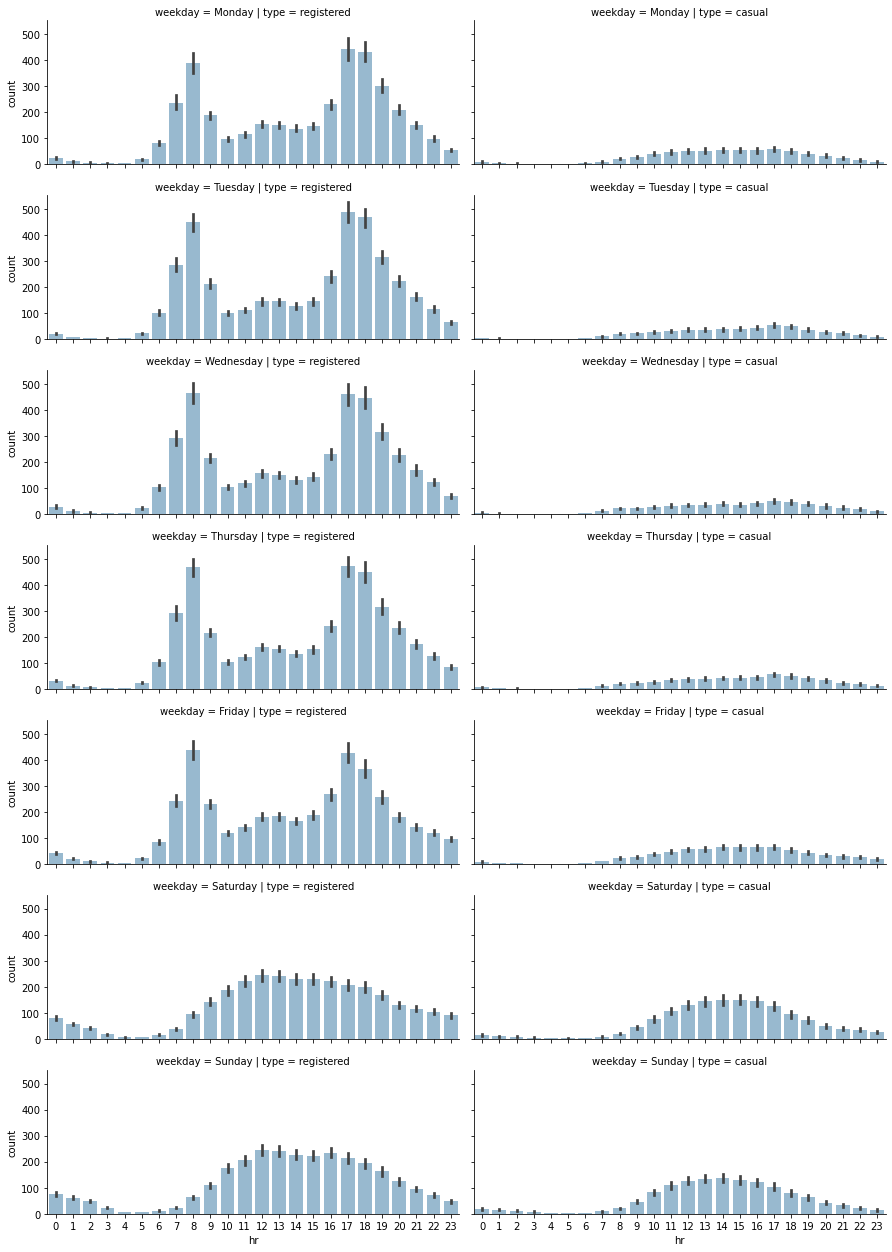

In [12]:
#select relevant columns
plot_data = preprocdata_df[['hr', 'weekday', 'registered', 'casual']]


"""transform data into a format, i.e no of entries are computed as count, 
   for each distinct hr, weekday and type (registered or casual)
"""

plot_data = plot_data.melt(id_vars=['hr','weekday'],var_name='type',value_name='count')

"""
create FacetGrid object which produces a grid plot where; rows= various days of the week and 
cols = different types (registered and casual)
"""
grid=sns.FacetGrid(plot_data,row='weekday',col='type',height=2.5,aspect=2.5,\
                  row_order=['Monday','Tuesday','Wednesday','Thursday','Friday',\
                            'Saturday','Sunday'])

#Populate the FacetGrid with specific plots
grid.map(sns.barplot,'hr','count',alpha=0.5);
grid.savefig('figs/weekday_hour_distributions.png',format='png');

From the plot, we can note that on working days, the highest number of rides for registered users takes place around 8 AM and at 6 PM. Which is in line with our expectations, as it is likely that most registered users use the bike sharing service for commuting.

On the other hand, the casual usage of bike sharing services on working days is quite limited

During the weekend, we see a change in distributions for both casual and registered users. Still, registered rides are more frequent than casual ones, both distributions have the same shape, almost uniformly distributed between the time interval of 11 AM to 6 PM

In conclusion, we could claim that most of the usage of bike sharing services occurs during working days, right before and right after the standard working time (that is, 9 to 5)

## 1.3 Analyzing Seasonal impact on rides

C:\Users\user\anaconda4\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


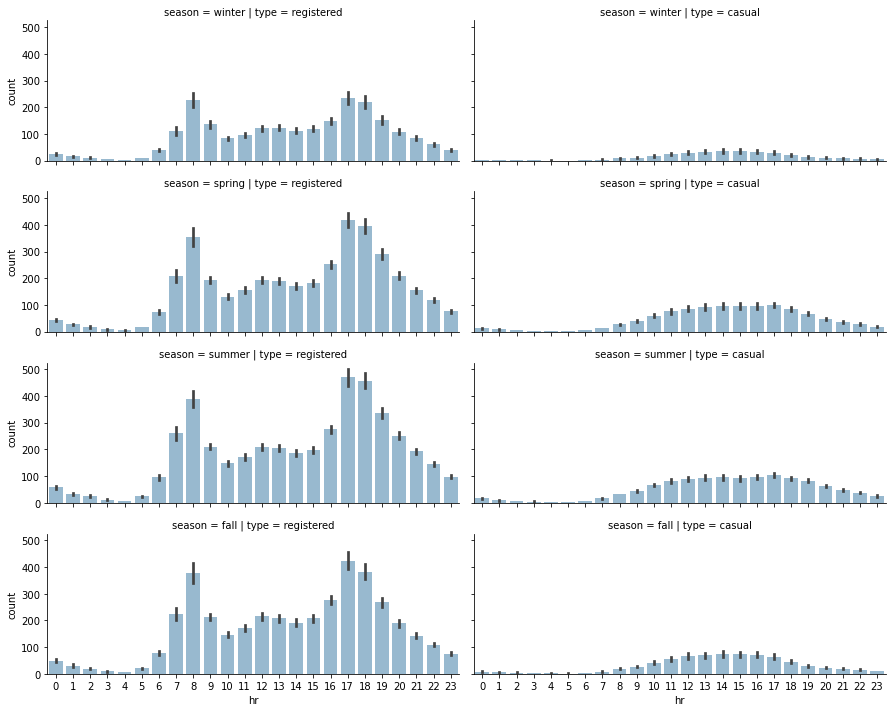

In [13]:
#Select subset of data
plot_data=preprocdata_df[['hr', 'season', 'registered', 'casual']]

#unpivot data from wide to long
plot_data=plot_data.melt(id_vars=['hr', 'season'],var_name='type',value_name='count')

#Define a FacetGrid
grid=sns.FacetGrid(plot_data, row="season", col="type",height=2.5,aspect=2.5,\
                   row_order=['winter', 'spring', 'summer', 'fall'])

# apply plotting function to each element in the grid
grid.map(sns.barplot,'hr','count',alpha=0.5)

# save figure
grid.savefig('figs/Seasonal_no_of_rides_by_time', format='png');

We can see that each season has a similar graph shape. An important thing to note is count of riders is lowest during the winter.

## 1.3.1 Seasonal distribution of rides on a weekday basis

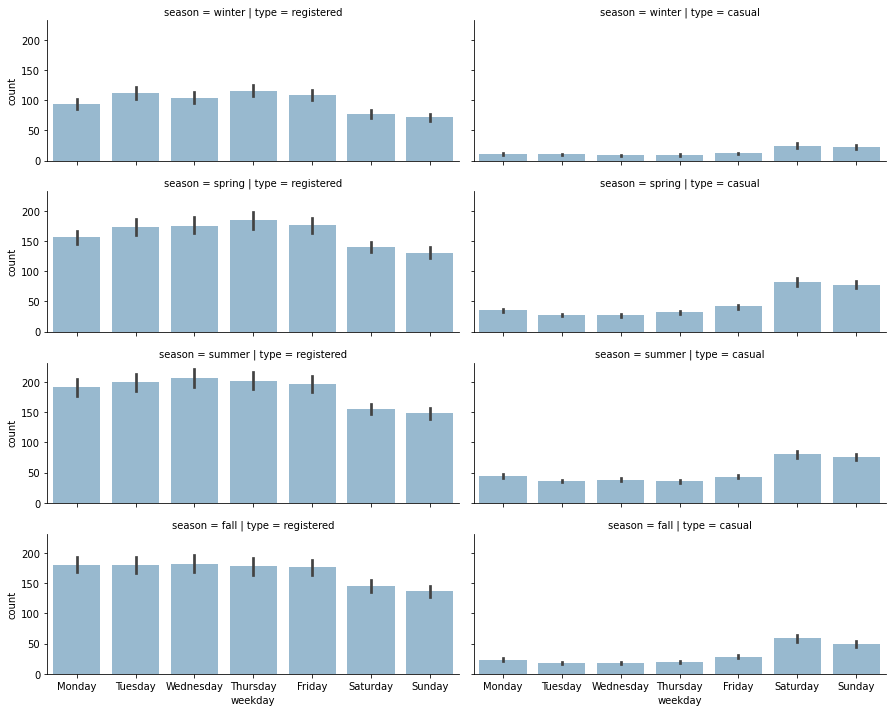

In [14]:
# create a subset for relevant columns
plot_data=preprocdata_df[['weekday', 'season', 'registered', 'casual']]

#unpivot data from wide to long
plot_data=plot_data.melt(id_vars=['weekday', 'season'],var_name='type',value_name='count')

#Define a FacetGrid
grid=sns.FacetGrid(plot_data, row="season", col="type",height=2.5,aspect=2.5,\
                   row_order=['winter', 'spring', 'summer', 'fall'])

# apply plotting function to each element in the grid
grid.map(sns.barplot,'weekday','count',alpha=0.5,\
        order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# save figure
grid.savefig('figs/Seasonal_no_of_rides_by_weekday', format='png');

The first major difference in this statistics is the change in pattern for ride users. Registered riders use the bike riding service more frequently during weekdays and less during weekends. On the other hand, Casual riders use the service more on weekends than weekdays.

Perhaps, registered rides tend to use our service for commuting purposes while casual customers use the service occasionally over the weekend. However, such a conclusion cannot be based solely on plot observations but has to be backed by statistical tests. 

Another crucial observation is the lower number of rides during winter only reinforces our previous finding. 

## 1.4 Estimating average registered rides

In [15]:
#compute pop mean of registered rides
pop_mean= preprocdata_df.registered.mean()

In [16]:
#get sample of data(summer 2011)
sample=preprocdata_df[(preprocdata_df.season=="summer")\
                      & (preprocdata_df.yr==2011)].registered

In [17]:
#perform t-test and compute p-value
from scipy.stats import ttest_1samp
test_result=ttest_1samp(sample,pop_mean)
print(f"Test Statistic: {test_result[0]}, p-value: {test_result[1]}")

Test Statistic: -3.491969148378619, p-value: 0.0004887645279519517


Our standard or (predifined) p-value is 0.05. The p-value obtained by statistic test is 0.0004887645279519517.

Since our calculated p-value < predefined p-value we will reject the null hypothes and assume lternative hypothesis is correct.

We You computed the average number of rides on the true population; therefore, the value computed by the statistical test should be the same.

**Why reject the null hypothesis?**
Our sample is not a true representation of the population, but rather a biased one. This is because we  selected only entries from the summer of 2011. Therefore, neither data from the 
full year is present, nor entries from 2012.

The mistake in our sample selection really screwed our statistical results. Therefore deal with this, we need to select a good or rather proper sample.

In [18]:
# get sample as 5% of the full data
import random
random.seed(111)
sample_unbiased= preprocdata_df.registered.sample(frac=0.05)
test_result_unbiased=ttest_1samp(sample_unbiased,pop_mean)
print(f" Unbiased test statistics: {test_result_unbiased[0]:.03f}, p-value: {test_result_unbiased[1]:.3f}")

 Unbiased test statistics: 2.004, p-value: 0.045


Our computed p-value=0.777 and is greater than the critical 0.05.
Therefore, we cannot regect the null hypothesis.

## 1.5 Hypothesis testing on registered rides

from our previous statistical descriptions(graph) we saw that registered users tend to perform more rides during working days than the weekend. 

 Assessing the correctness of this statement is crucial, we will perform a hypothesis test in which we will test whether the mean of registered rides during working days is the same as during 
the weekends. 

**Formulating our hypothesis;**

                            H_0 : average registered rides over weekdays-average registered rides over weekend=0
                            H_a : average registered rides over weekdays-average registered rides over weekend≠0

In [19]:
# define mask, indicating if the day is weekend or work day
weekend_days=['Saturday', 'Sunday']
weekend_mask=preprocdata_df.weekday.isin(weekend_days)
workingdays_mask= ~preprocdata_df.weekday.isin(weekend_days)

#select registered rides for weekend and working days
weekend_data=preprocdata_df.registered[weekend_mask]
workingdays_data=preprocdata_df.registered[workingdays_mask]

#perform two-sample ttest
from scipy.stats import ttest_ind
test_res=ttest_ind(weekend_data,workingdays_data)
print(f" Statistic Value: {test_res[0]:.03f},p-value: {test_res[1]:.03f}")


 Statistic Value: -16.004,p-value: 0.000


Our calculated p-value =0.0001, and is < 0.05(standard critical).

Therefore we reject the null hypothesis and confirm that our initial observation is correct: that is, there is a statistically 
significant difference between the number of rides performed during working days and the weekend 

C:\Users\user\anaconda4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


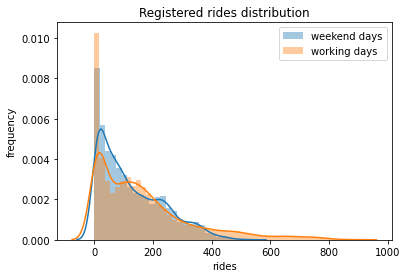

In [20]:
"""plot distributions of registered rides for working vs weekend days"""
sns.distplot(weekend_data,label="weekend days")
sns.distplot(workingdays_data,label="working days")
plt.legend()
plt.xlabel("rides")
plt.ylabel("frequency")
plt.title("Registered rides distribution")
plt.savefig("figs/distributions_of_registered_rides.png",format="png")

The figure above further reinforces and validates our previous argument.

## 1.6 Hypothesis testing on casual rides

On the second assumption, the assumption that casual users perform more rides during the weekend. 
We need to formulate null hypothesis to test its validity;

                          H_0 : average casual rides over weekdays-average casual rides over weekend=0
                          H_a : average casual rides over weekdays-average casual rides over weekend≠0


In [21]:
# select casual rides for the weekend and working days
weekend_data=preprocdata_df.casual[weekend_mask]
workingdays_data=preprocdata_df.casual[workingdays_mask]

# perform ttest
test_res=ttest_ind(weekend_data,workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, p-value: {test_res[1]:.03f}")

Statistic value: 41.077, p-value: 0.000


Our calculated p-value=0.000,and < 0.05(Standard Point). Therefore we reject null hypothesis and conclude that our earlier assumption is correct.

C:\Users\user\anaconda4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


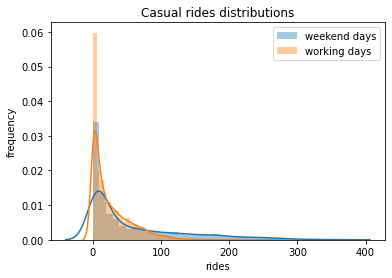

In [22]:
# plot distributions of casual rides for working vs weekend days
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Casual rides distributions")
plt.savefig('figs/distributions_of_casual_rides.png', format='png')

## 2.0 Analysis of Weather Related Features

The weather features include; weathersit,temp,atemp,hum and windspeed.From the provided descriptions, we can see that most of the weather-related features assume continuous values (except for weathersit).most common way to measure the relationship 
between two different continuous variables is to measure their correlation.    

In [23]:
from scipy.stats import pearsonr, spearmanr

In [24]:
# define function for computing correlations

def correlation(data,col):
    pearson_reg=pearsonr(data[col], data["registered"])[0]
    pearson_cas=pearsonr(data[col], data["casual"])[0]
    spearman_reg=spearmanr(data[col], data["registered"])[0]
    spearman_cas=spearmanr(data[col], data["casual"])[0]
    
    return pd.Series({"Pearson (registered)": pearson_reg,\
                      "Spearman (registered)": spearman_reg,\
                      "Pearson (casual)": pearson_cas,\
                      "Spearman (casual)": spearman_cas
                      })

In [25]:
# compute correlation measures between different features
cols=["temp", "atemp", "hum", "windspeed"]
corr_data=pd.DataFrame(index=["Pearson (registered)",\
                              "Spearman (registered)",\
                              "Pearson (casual)",\
                              "Spearman (casual)"])
for col in cols:
    corr_data[col]=correlation(preprocdata_df,col)

corr_data.T

,Pearson (registered),Spearman (registered),Pearson (casual),Spearman (casual)
temp,0.335361,0.373196,0.459616,0.570989
atemp,0.332559,0.373014,0.454080,0.570419
hum,-0.273933,-0.338480,-0.347028,-0.388213
windspeed,0.082321,0.122936,0.090287,0.122920


We observe thatthe Pearson and Spearman correlation coefficient are close enough (some non-linearity is to be expected) for most variables. However, the most striking difference between the two coefficients occurs when comparing the temp (and 
atemp) for casual columns. Notice the Spearman correlation is quite high, meaning that there is significant evidence for a nonlinear,which is strong and positive relationship. 

**Interpretation of it?**

The casual customers are far keener on using the bike sharing service when temperatures are higher. Our previous analysis also showed casual customers ride mostly during the weekend, and they 
do not rely on bike sharing services for commuting to work.

### Correlation matrix

This is a useful techniques which allows the analyst to quickly visualize any possible relationships between the different features and identify potential clusters with highly correlated features.

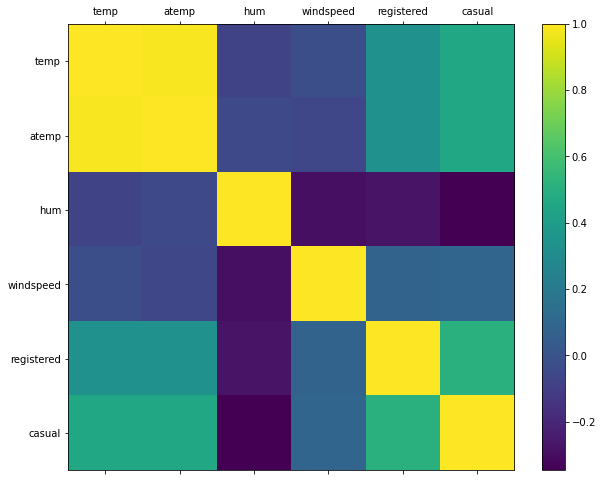

In [26]:
#plot correlation matrix
cols=  ["temp", "atemp", "hum", "windspeed", "registered", "casual"]

plot_data=preprocdata_df[cols]
corr=plot_data.corr()

fig=plt.figure(figsize=(10,8))
plt.matshow(corr,fignum=fig.number)
plt.xticks(range(len(plot_data.columns)),plot_data.columns)
plt.yticks(range(len(plot_data.columns)),plot_data.columns)
plt.colorbar()
plt.ylim([5.5,-0.5])
fig.savefig('figs/correlations.png', format='png')

## 3.0 Time Series Analysis

When it comes to T.S one important concept is the notion of stationarity (Strong stationarity and weak stationarity). Checking for stationarity. The techniques we will use to identify stationarity are Rolling Statistics and Augmented Dickey Fullers Statistics (ADF).

In [27]:
# get daily rides
daily_rides=preprocdata_df[["dteday", "registered", "casual"]]
daily_rides=daily_rides.groupby('dteday').sum()

# convert index to DateTime object
daily_rides.index=pd.to_datetime(daily_rides.index)

In [28]:
#define function for plotting rolling statistics and ADF test for time series
from statsmodels.tsa.stattools import adfuller

def stationary_tests(ts,window=10,**kwargs):
    # create DF for plotting
    plot_data=pd.DataFrame(ts)
    plot_data['rolling_mean']=ts.rolling(window).mean()
    plot_data['rolling_std']=ts.rolling(window).std()
    # compute p-value of Dickey-Fuller test
    p_val=adfuller(ts)[1]
    ax=plot_data.plot(**kwargs)
    ax.set_title(f"Dickey-Fuller p-value: {p_val:.3f}")
    

<Figure size 432x288 with 0 Axes>

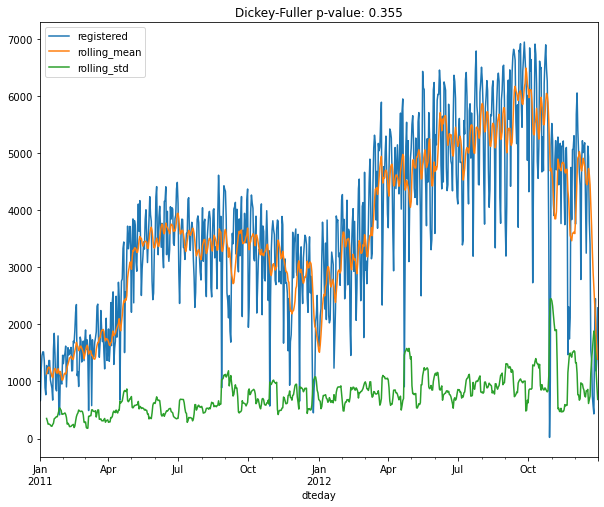

In [29]:
plt.figure()
stationary_tests(daily_rides['registered'],figsize=(10,8))
plt.savefig('figs/daily_registered_timesseries.png',format='png');

<Figure size 432x288 with 0 Axes>

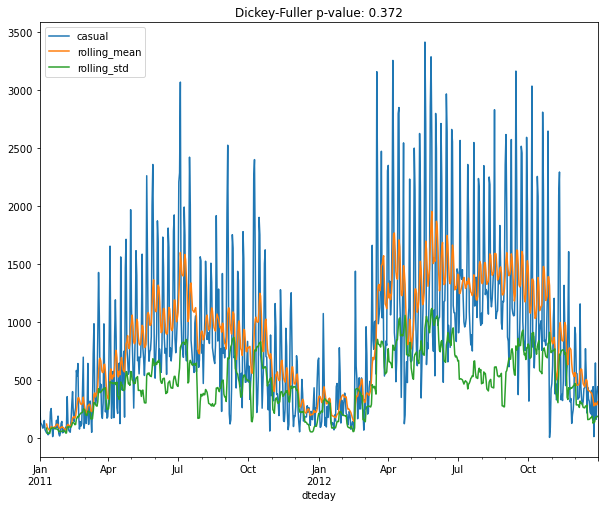

In [30]:
plt.figure()
stationary_tests(daily_rides['casual'],figsize=(10,8))
plt.savefig('figs/daily_casual_timesseries.png',format='png');

From the performed tests, we can see that neither the moving average nor standard deviations are stationary. Furthermore, the Dickey-Fuller test returns values of 0.355 and 0.372 for the registered and casual columns, respectively. This is strong 
evidence that the time series is not stationary, and we need to process them in order to obtain a stationary one.

## 3.1 Techniques to detrend our time series

       **1. Subtracting moving averages**
       **2. Subtacting last value**
       **3. Time series decomposition**

In [31]:
# make time series stationary
reg = daily_rides["registered"]
reg_ma=reg.rolling(10).mean()
reg_ma_diff=reg-reg_ma
reg_ma_diff.dropna(inplace=True)

cas=daily_rides["casual"]
cas_ma=cas.rolling(10).mean()
cas_ma_diff=cas-cas_ma
cas_ma_diff.dropna(inplace=True)                     

<Figure size 432x288 with 0 Axes>

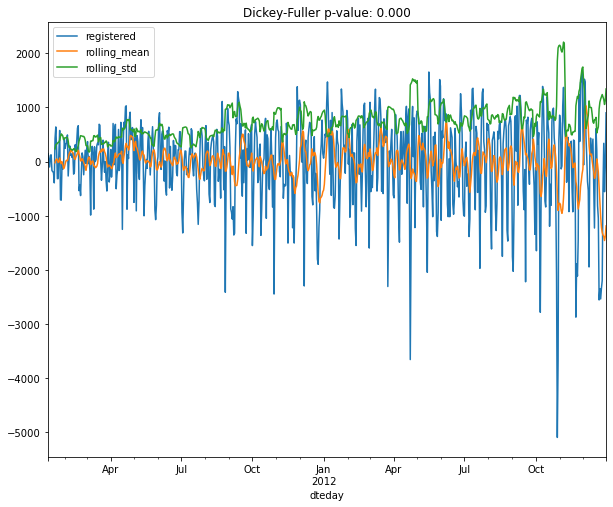

In [32]:
plt.figure()
stationary_tests(reg_ma_diff, figsize=(10, 8))
plt.savefig('figs/daily_registered_ma_diff.png', format='png')

<Figure size 432x288 with 0 Axes>

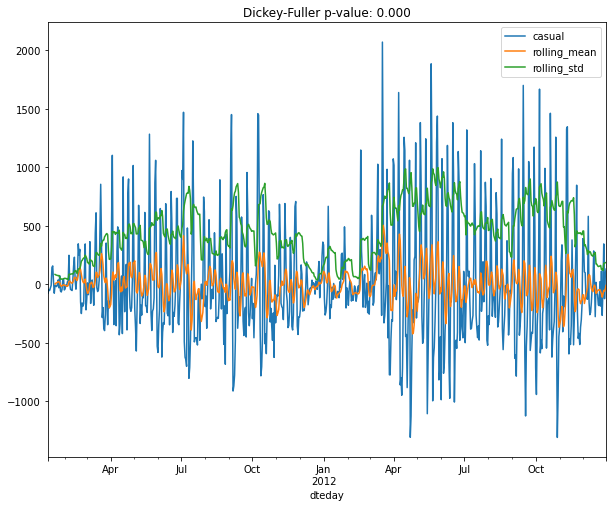

In [33]:
plt.figure()
stationary_tests(cas_ma_diff, figsize=(10, 8))
plt.savefig('figs/daily_casual_ma_diff.png', format='png')

In [34]:
# subtract last value
reg = daily_rides["registered"]
reg_diff = reg - reg.shift()
reg_diff.dropna(inplace=True)

cas = daily_rides["casual"]
cas_diff = cas - cas.shift()
cas_diff.dropna(inplace=True)

<Figure size 432x288 with 0 Axes>

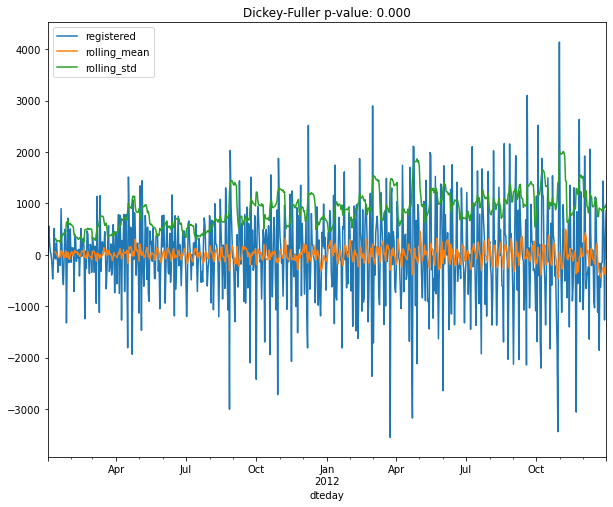

In [35]:
plt.figure()
stationary_tests(reg_diff, figsize=(10, 8))
plt.savefig('figs/daily_registered_diff.png', format='png')

<Figure size 432x288 with 0 Axes>

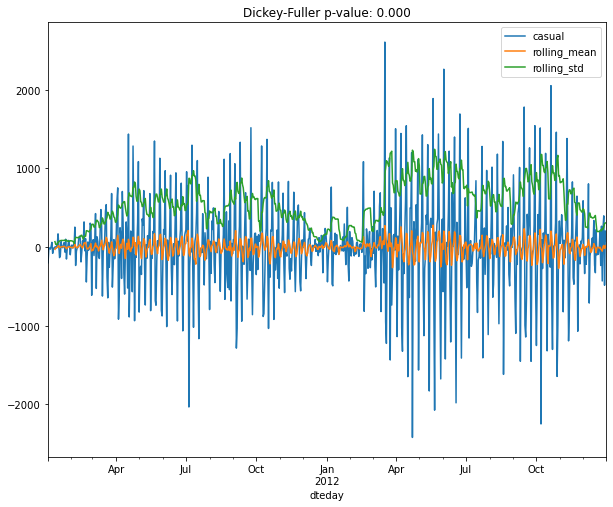

In [36]:
plt.figure()
stationary_tests(cas_diff, figsize=(10, 8))
plt.savefig('figs/daily_casual_diff.png', format='png')

As we can see, both techniques returned a time series which is stationary, according to the Dickey-Fuller test. Note that an interesting pattern occurs in the casual series: a rolling standard deviation exhibits a clustering effect, that is, periods 
in which the standard deviation is higher and periods in which it is lower. This effect is quite common in certain fields (finance) and is known as volatility clustering. A possible interpretation, relative to our data, is that the number of casual 
rides increases during summer periods and drops during the winter.

A possible interpretation, is that the number of casual rides increases during summer periods and drops during the winter.

## 3.2 Time series decomposition in trend, seasonality and residuals

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

reg_decomposition = seasonal_decompose(daily_rides["registered"])
cas_decomposition = seasonal_decompose(daily_rides["casual"])

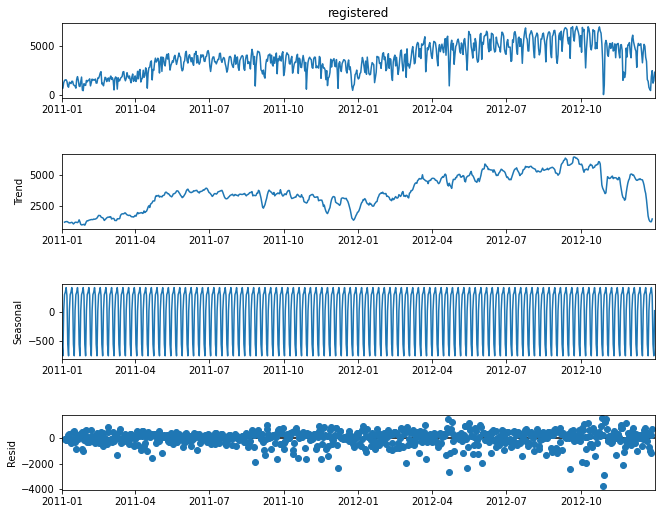

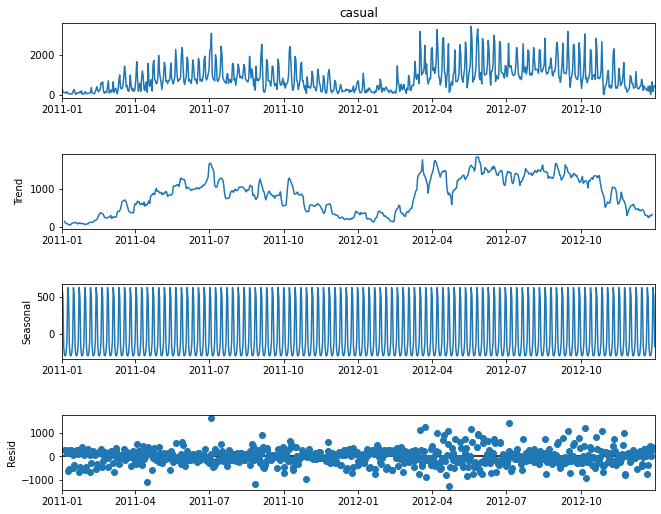

In [38]:
# plot decompositions
registered_plot = reg_decomposition.plot()
registered_plot.set_size_inches(10, 8)

casual_plot = cas_decomposition.plot()
casual_plot.set_size_inches(10, 8)

registered_plot.savefig('figs/registered_decomposition.png', format='png')
casual_plot.savefig('figs/casual_decomposition.png', format='png')

<Figure size 432x288 with 0 Axes>

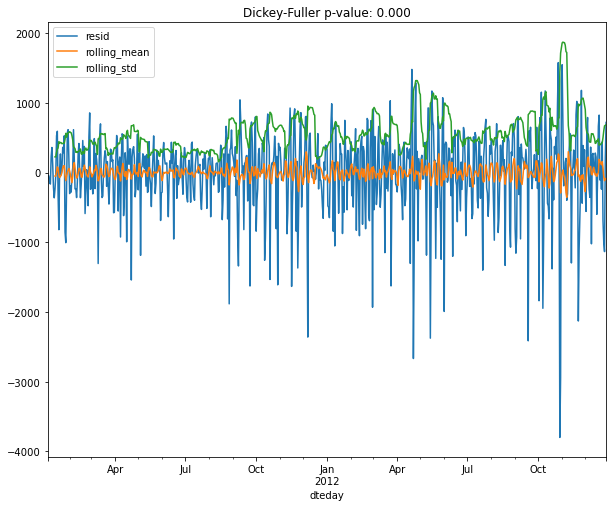

In [39]:
# test residuals for stationarity
plt.figure()
stationary_tests(reg_decomposition.resid.dropna(), figsize=(10, 8))
plt.savefig('figs/registered_resid.png', format='png')

<Figure size 432x288 with 0 Axes>

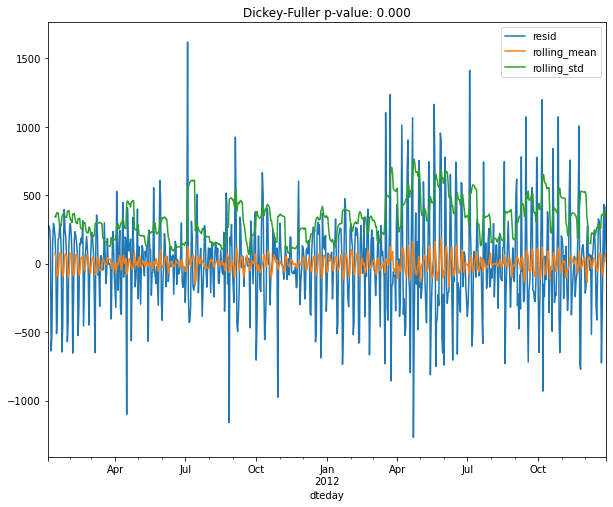

In [40]:
plt.figure()
stationary_tests(cas_decomposition.resid.dropna(), figsize=(10, 8))
plt.savefig('figs/casual_resid.png', format='png')

## 4.1 ACF and PACF Plots for Registered Rides

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\user\anaconda4\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\user\anaconda4\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\user\anaconda4\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


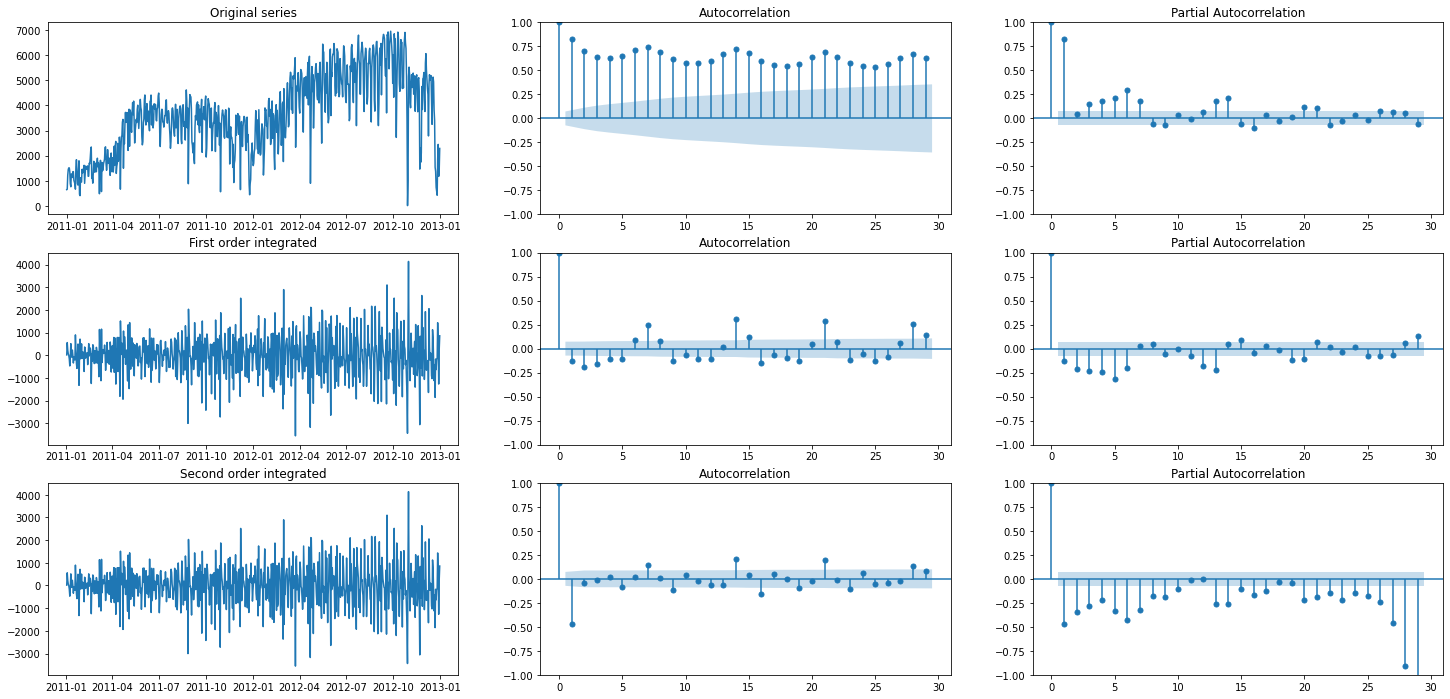

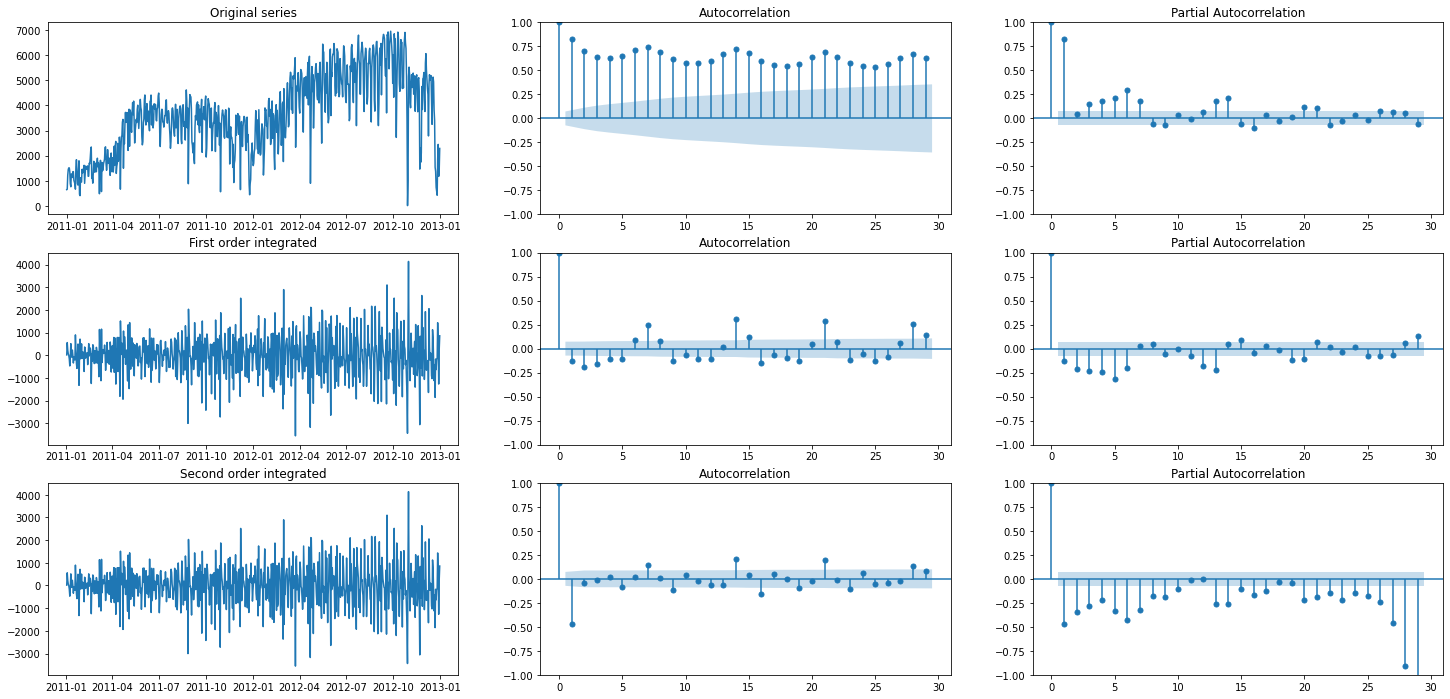

In [42]:
fig, axes = plt.subplots(3, 3, figsize=(25, 12))

# plot original series
original = daily_rides["registered"]
axes[0,0].plot(original)
axes[0,0].set_title("Original series")
plot_acf(original, ax=axes[0,1])
plot_pacf(original, ax=axes[0,2])

# plot first order integrated series
first_order_int = original.diff().dropna()
axes[1,0].plot(first_order_int)
axes[1,0].set_title("First order integrated")
plot_acf(first_order_int, ax=axes[1,1])
plot_pacf(first_order_int, ax=axes[1,2])

# plot first order integrated series
second_order_int = first_order_int.diff().dropna()
axes[2,0].plot(first_order_int)
axes[2,0].set_title("Second order integrated")
plot_acf(second_order_int, ax=axes[2,1])
plot_pacf(second_order_int, ax=axes[2,2])

From the plots above, the original series exhibits several autocorrelation coefficients that are above the threshold. 
The first order integrated series has only a few, which makes it a good candidate for further modeling (hence, selecting 
an ARIMA(p,1,q) model). Finally, the second order integrated series present a large negative autocorrelation of lag 1, 
which, in general, is a sign of too large an order of integration

## 4.2 Finding the best parameters and Coefficient for outr ARIMA model

Our focus is in finding model parameters and coefficients for an ARIMA(p,d,q) model, based on the observed registered 
rides. 
The general approach is to try different combinations of parameters and chose the one that minimizes certain information
criterion, for instance; 

                 the Akaike Information Criterion (AIC) or 
                 the Bayesian Information Criterion (BIC)

In [43]:
#conda install -c saravji pmdarima

In [44]:
reg = daily_rides["registered"]

In [45]:
from pmdarima import auto_arima
model = auto_arima(reg, start_p=1, start_q=1, \
                   max_p=3, max_q=3, information_criterion="aic")
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  731
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -5854.502
Date:                Sat, 22 Oct 2022   AIC                          11723.005
Time:                        18:00:52   BIC                          11755.156
Sample:                             0   HQIC                         11735.409
                                - 731                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6063      0.050     32.356      0.000       1.509       1.704
ar.L2         -1.4458      0.062    -23.317      0.000      -1.567      -1.324
ar.L3          0.3595      0.049      7.361      0.0

Our best best model is Arima(3, 1, 3) and coef column contains the coefficients for the model itself.

## 4.3 Evaluation how well our model predicted.

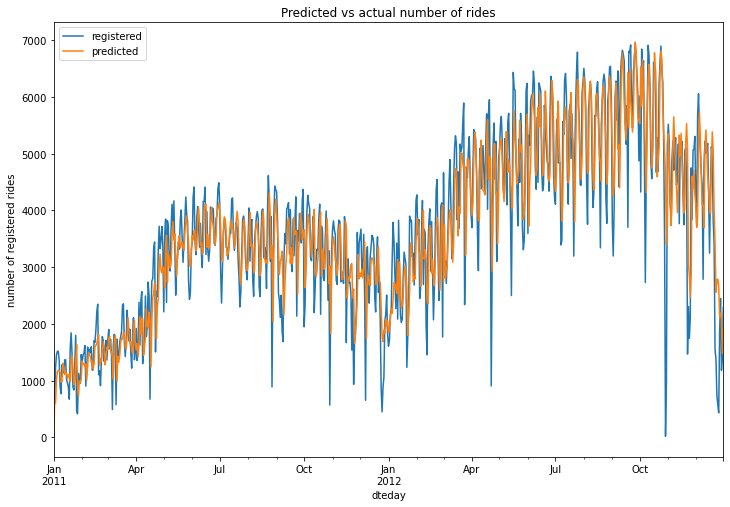

In [46]:
# plot original and predicted values
plot_data = pd.DataFrame(reg)
plot_data['predicted'] = model.predict_in_sample()
plot_data.plot(figsize=(12, 8))
plt.ylabel("number of registered rides")
plt.title("Predicted vs actual number of rides")
plt.savefig('figs/registered_arima_fit.png', format='png')


**We can see that the predicted column follows the original one quite well, although it is unable to correctly model a 
large number of rise and fall movements in the registered series.**